In [1]:
pip install xgboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 278.2 kB/s eta 0:00:0000:0100:01
Note: you may need to restart the kernel to use updated packages.


In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import xgboost as xgb
from sklearn.metrics import accuracy_score

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [2]:
df = pd.read_csv('/Users/rileydouglas/Downloads/Research_final.csv')
df.head(10)

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,...,Education_Level_Doctorate,Education_Level_Graduate,Education_Level_High School,Education_Level_Post-Graduate,Education_Level_Uneducated,Education_Level_Unknown,Card_Category_Blue,Card_Category_Gold,Card_Category_Platinum,Card_Category_Silver
0,1,45,1,3,39,5,1,3,12691,777,...,0,0,1,0,0,0,1,0,0,0
1,1,49,0,5,44,6,1,2,8256,864,...,0,1,0,0,0,0,1,0,0,0
2,1,51,1,3,36,4,1,0,3418,0,...,0,1,0,0,0,0,1,0,0,0
3,1,40,0,4,34,3,4,1,3313,2517,...,0,0,1,0,0,0,1,0,0,0
4,1,40,1,3,21,5,1,0,4716,0,...,0,0,0,0,1,0,1,0,0,0
5,1,44,1,2,36,3,1,2,4010,1247,...,0,1,0,0,0,0,1,0,0,0
6,1,51,1,4,46,6,1,3,34516,2264,...,0,0,0,0,0,1,0,1,0,0
7,1,32,1,0,27,2,2,2,29081,1396,...,0,0,1,0,0,0,0,0,0,1
8,1,37,1,3,36,5,2,0,22352,2517,...,0,0,0,0,1,0,1,0,0,0
9,1,48,1,2,36,6,3,3,11656,1677,...,0,1,0,0,0,0,1,0,0,0


In [3]:
X = df.drop('Attrition_Flag', axis=1)  
y = df['Attrition_Flag']  

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [10]:
model = xgb.XGBClassifier(
    objective='binary:logistic', 
    max_depth=6,  
    learning_rate=0.1,  
    n_estimators=100,  
    subsample=0.8,  
    colsample_bytree=0.8,  
    random_state=42
)

# Train the model with evaluation set
eval_set = [(X_train, y_train), (X_test, y_test)] 
model.fit(X_train, y_train, eval_set=eval_set, eval_metric='error', verbose=True)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

[0]	validation_0-error:0.16047	validation_1-error:0.16140
[1]	validation_0-error:0.16047	validation_1-error:0.16140
[2]	validation_0-error:0.16047	validation_1-error:0.16140
[3]	validation_0-error:0.15689	validation_1-error:0.15745
[4]	validation_0-error:0.14529	validation_1-error:0.15054
[5]	validation_0-error:0.10085	validation_1-error:0.11747
[6]	validation_0-error:0.08172	validation_1-error:0.10020
[7]	validation_0-error:0.06839	validation_1-error:0.08391
[8]	validation_0-error:0.05987	validation_1-error:0.07354
[9]	validation_0-error:0.05382	validation_1-error:0.06861
[10]	validation_0-error:0.05160	validation_1-error:0.06663
[11]	validation_0-error:0.05036	validation_1-error:0.06417
[12]	validation_0-error:0.04851	validation_1-error:0.06269
[13]	validation_0-error:0.04802	validation_1-error:0.06367
[14]	validation_0-error:0.04703	validation_1-error:0.06219
[15]	validation_0-error:0.04456	validation_1-error:0.06071
[16]	validation_0-error:0.04000	validation_1-error:0.05479
[17]	va

/Users/rileydouglas/opt/anaconda3/envs/DEEPLEARNING/lib/python3.11/site-packages/xgboost/sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[29]	validation_0-error:0.02790	validation_1-error:0.04492
[30]	validation_0-error:0.02728	validation_1-error:0.04640
[31]	validation_0-error:0.02617	validation_1-error:0.04344
[32]	validation_0-error:0.02592	validation_1-error:0.04245
[33]	validation_0-error:0.02555	validation_1-error:0.04195
[34]	validation_0-error:0.02469	validation_1-error:0.04195
[35]	validation_0-error:0.02444	validation_1-error:0.04146
[36]	validation_0-error:0.02444	validation_1-error:0.04245
[37]	validation_0-error:0.02333	validation_1-error:0.04294
[38]	validation_0-error:0.02308	validation_1-error:0.04047
[39]	validation_0-error:0.02210	validation_1-error:0.04047
[40]	validation_0-error:0.02247	validation_1-error:0.03998
[41]	validation_0-error:0.02210	validation_1-error:0.03998
[42]	validation_0-error:0.02136	validation_1-error:0.03949
[43]	validation_0-error:0.02148	validation_1-error:0.03949
[44]	validation_0-error:0.02123	validation_1-error:0.03949
[45]	validation_0-error:0.02061	validation_1-error:0.039

In [11]:
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.85      0.88       327
           1       0.97      0.98      0.98      1699

    accuracy                           0.96      2026
   macro avg       0.94      0.92      0.93      2026
weighted avg       0.96      0.96      0.96      2026



Text(95.72222222222221, 0.5, 'Truth')

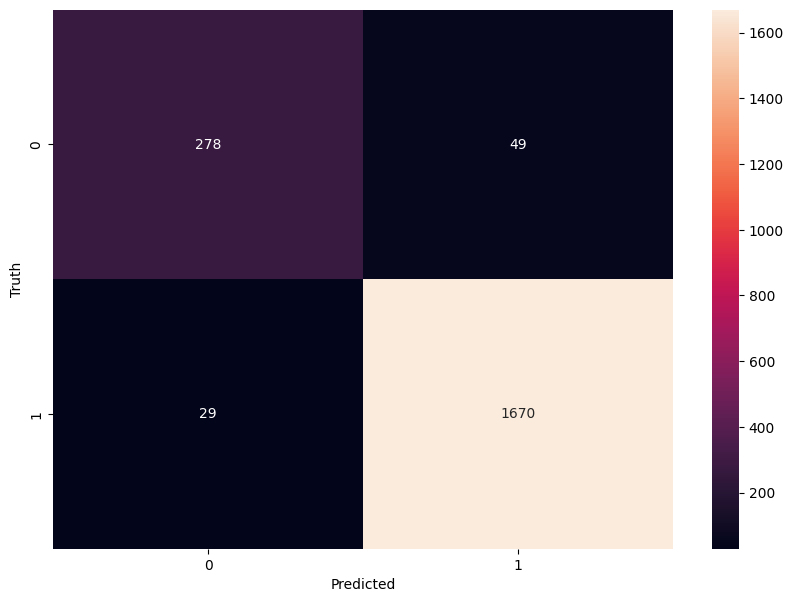

In [12]:
import seaborn as sn
import tensorflow as tf 
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

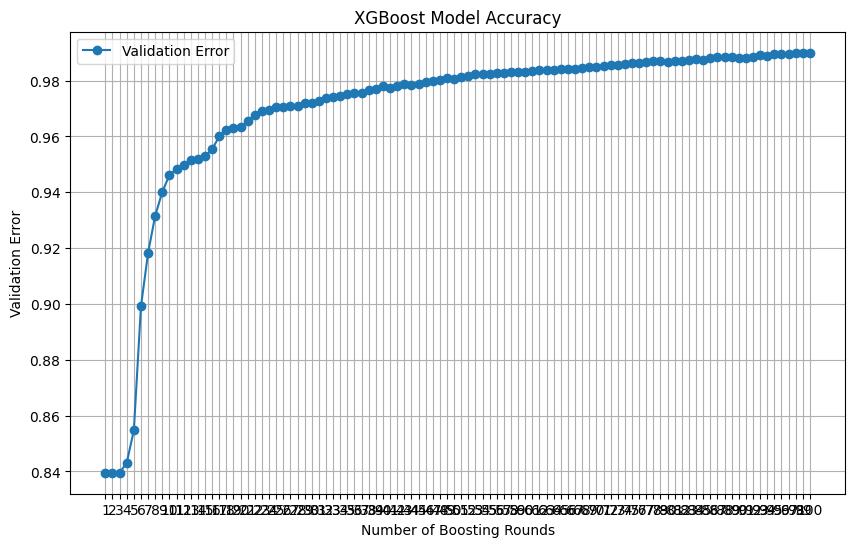

In [15]:
num_rounds = len(model.evals_result()['validation_0']['error'])

# Extract the validation error (1 - accuracy) for each boosting round
validation_error = 1 - np.array(model.evals_result()['validation_0']['error'])

# Plot the validation error
plt.figure(figsize=(10, 6))
plt.plot(range(1, num_rounds + 1), validation_error, label='Validation Error', marker='o', linestyle='-')
plt.xlabel('Number of Boosting Rounds')
plt.ylabel('Validation Error')
plt.title('XGBoost Model Accuracy')
plt.xticks(range(1, num_rounds + 1))
plt.grid(True)
plt.legend()
plt.show()